In [3]:
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt

In [6]:
df1.shape

(2388931, 130)

In [7]:
# Delimitando as colunas a serem analizadas.
cols = ['ID_REGIAO' ,'ID_UF' ,'ID_MUNICIPIO' ,'ID_TURNO' , 
 'IN_SITUACAO_CENSO','IN_PREENCHIMENTO_MT','PROFICIENCIA_MT_SAEB','PROFICIENCIA_LP_SAEB',
 'IN_PREENCHIMENTO_QUESTIONARIO', 'TX_RESP_Q001' ,'TX_RESP_Q002',
 'TX_RESP_Q003A' ,'TX_RESP_Q003B' ,'TX_RESP_Q003C', 'TX_RESP_Q003D',
 'TX_RESP_Q003E', 'TX_RESP_Q004', 'TX_RESP_Q005' ,'TX_RESP_Q006A',
 'TX_RESP_Q006B', 'TX_RESP_Q006C' ,'TX_RESP_Q006D', 'TX_RESP_Q006E',
 'TX_RESP_Q007' ,'TX_RESP_Q008A', 'TX_RESP_Q008B', 'TX_RESP_Q008C',
 'TX_RESP_Q009A' ,'TX_RESP_Q009B', 'TX_RESP_Q009C' ,'TX_RESP_Q009D',
 'TX_RESP_Q009E' ,'TX_RESP_Q009F' ,'TX_RESP_Q009G' ,'TX_RESP_Q010A',
 'TX_RESP_Q010B' ,'TX_RESP_Q010C', 'TX_RESP_Q010D' ,'TX_RESP_Q010E',
 'TX_RESP_Q010F', 'TX_RESP_Q010G', 'TX_RESP_Q010H', 'TX_RESP_Q010I',
 'TX_RESP_Q011', 'TX_RESP_Q012', 'TX_RESP_Q013' ,'TX_RESP_Q014',
 'TX_RESP_Q015', 'TX_RESP_Q016' ,'TX_RESP_Q017A' ,'TX_RESP_Q017B',
 'TX_RESP_Q017C' ,'TX_RESP_Q017D', 'TX_RESP_Q017E' ,'TX_RESP_Q018A',
 'TX_RESP_Q018B' ,'TX_RESP_Q018C' ,'TX_RESP_Q019']
df = pd.read_csv('TS_ALUNO_9EF.csv', usecols= cols, sep= ',')
df.head()

,ID_REGIAO,ID_UF,ID_MUNICIPIO,ID_TURNO,IN_SITUACAO_CENSO,IN_PREENCHIMENTO_MT,PROFICIENCIA_LP_SAEB,PROFICIENCIA_MT_SAEB,IN_PREENCHIMENTO_QUESTIONARIO,TX_RESP_Q001,...,TX_RESP_Q016,TX_RESP_Q017A,TX_RESP_Q017B,TX_RESP_Q017C,TX_RESP_Q017D,TX_RESP_Q017E,TX_RESP_Q018A,TX_RESP_Q018B,TX_RESP_Q018C,TX_RESP_Q019
0,1,11,1100015,1,1,1,228.526070,239.920418,1,A,...,A,D,A,D,B,A,C,B,A,C
1,1,11,1100015,1,1,1,222.526072,244.042645,1,A,...,A,D,A,D,B,A,A,A,A,C
2,1,11,1100015,1,1,1,226.839993,230.205828,1,A,...,A,D,A,D,C,A,C,B,B,D
3,1,11,1100015,1,1,1,256.798882,268.977498,1,A,...,A,C,A,D,C,A,A,A,A,D
4,1,11,1100015,1,1,1,206.393744,260.803189,1,A,...,A,C,A,*,B,A,B,A,A,C


In [8]:
# Selecionando somente os alunos que preencheram a prova de mt.
df = df[(df["IN_PREENCHIMENTO_MT"]==1)&(df['IN_PREENCHIMENTO_QUESTIONARIO']==1)]
df.drop(['IN_PREENCHIMENTO_MT','IN_PREENCHIMENTO_QUESTIONARIO'], axis=1, inplace = True)
df.head()

,ID_REGIAO,ID_UF,ID_MUNICIPIO,ID_TURNO,IN_SITUACAO_CENSO,PROFICIENCIA_LP_SAEB,PROFICIENCIA_MT_SAEB,TX_RESP_Q001,TX_RESP_Q002,TX_RESP_Q003A,...,TX_RESP_Q016,TX_RESP_Q017A,TX_RESP_Q017B,TX_RESP_Q017C,TX_RESP_Q017D,TX_RESP_Q017E,TX_RESP_Q018A,TX_RESP_Q018B,TX_RESP_Q018C,TX_RESP_Q019
0,1,11,1100015,1,1,228.526070,239.920418,A,A,B,...,A,D,A,D,B,A,C,B,A,C
1,1,11,1100015,1,1,222.526072,244.042645,A,C,B,...,A,D,A,D,B,A,A,A,A,C
2,1,11,1100015,1,1,226.839993,230.205828,A,C,B,...,A,D,A,D,C,A,C,B,B,D
3,1,11,1100015,1,1,256.798882,268.977498,A,C,B,...,A,C,A,D,C,A,A,A,A,D
4,1,11,1100015,1,1,206.393744,260.803189,A,A,B,...,A,C,A,*,B,A,B,A,A,C


In [9]:
# Verificando a quantidade de alunos que preencheram a prova.
df.shape

(1924129, 56)

In [10]:
# Analizando o comportamento das notas.
df['PROFICIENCIA_MT_SAEB'].describe()

count    1.924083e+06
mean     2.572198e+02
std      4.904436e+01
min      1.263265e+02
25%      2.231211e+02
50%      2.589428e+02
75%      2.917224e+02
max      3.974874e+02
Name: PROFICIENCIA_MT_SAEB, dtype: float64

In [11]:
df.dtypes

ID_REGIAO                 int64
ID_UF                     int64
ID_MUNICIPIO              int64
ID_TURNO                  int64
IN_SITUACAO_CENSO         int64
PROFICIENCIA_LP_SAEB    float64
PROFICIENCIA_MT_SAEB    float64
TX_RESP_Q001             object
TX_RESP_Q002             object
TX_RESP_Q003A            object
TX_RESP_Q003B            object
TX_RESP_Q003C            object
TX_RESP_Q003D            object
TX_RESP_Q003E            object
TX_RESP_Q004             object
TX_RESP_Q005             object
TX_RESP_Q006A            object
TX_RESP_Q006B            object
TX_RESP_Q006C            object
TX_RESP_Q006D            object
TX_RESP_Q006E            object
TX_RESP_Q007             object
TX_RESP_Q008A            object
TX_RESP_Q008B            object
TX_RESP_Q008C            object
TX_RESP_Q009A            object
TX_RESP_Q009B            object
TX_RESP_Q009C            object
TX_RESP_Q009D            object
TX_RESP_Q009E            object
TX_RESP_Q009F            object
TX_RESP_

In [12]:
df = df.replace("*", np.nan)
df = df.replace(".", np.nan)
df = df.replace(" ", np.nan)

In [13]:
df.isna().sum()

ID_REGIAO                    0
ID_UF                        0
ID_MUNICIPIO                 0
ID_TURNO                     0
IN_SITUACAO_CENSO            0
PROFICIENCIA_LP_SAEB        46
PROFICIENCIA_MT_SAEB        46
TX_RESP_Q001             61574
TX_RESP_Q002             73412
TX_RESP_Q003A           149785
TX_RESP_Q003B           205046
TX_RESP_Q003C           223606
TX_RESP_Q003D           418212
TX_RESP_Q003E           439103
TX_RESP_Q004             83994
TX_RESP_Q005             71862
TX_RESP_Q006A           110969
TX_RESP_Q006B            94783
TX_RESP_Q006C           115902
TX_RESP_Q006D           118713
TX_RESP_Q006E           109846
TX_RESP_Q007            175816
TX_RESP_Q008A            57777
TX_RESP_Q008B           100268
TX_RESP_Q008C            79422
TX_RESP_Q009A            41932
TX_RESP_Q009B           102556
TX_RESP_Q009C           169618
TX_RESP_Q009D            73677
TX_RESP_Q009E            60267
TX_RESP_Q009F            66865
TX_RESP_Q009G            50235
TX_RESP_

In [14]:
# Tratamento de dados nulos
df.dropna(inplace=True)
df.shape

(871477, 56)

# Separando dados por niveis
escala = [
    (df["PROFICIENCIA_MT_SAEB"] >= 175)  & (df["PROFICIENCIA_MT_SAEB"] < 200),
    (df["PROFICIENCIA_MT_SAEB"] >= 200) & (df["PROFICIENCIA_MT_SAEB"] < 225),
    (df["PROFICIENCIA_MT_SAEB"] >= 225) & (df["PROFICIENCIA_MT_SAEB"] < 250),
    (df["PROFICIENCIA_MT_SAEB"] >= 250) & (df["PROFICIENCIA_MT_SAEB"] < 275),
    (df["PROFICIENCIA_MT_SAEB"] >= 275) & (df["PROFICIENCIA_MT_SAEB"] < 300),
    (df["PROFICIENCIA_MT_SAEB"] >= 300) & (df["PROFICIENCIA_MT_SAEB"] < 325),
    (df["PROFICIENCIA_MT_SAEB"] >= 325) & (df["PROFICIENCIA_MT_SAEB"] < 350),
    (df["PROFICIENCIA_MT_SAEB"] >= 350) & (df["PROFICIENCIA_MT_SAEB"] < 375),
    (df["PROFICIENCIA_MT_SAEB"] >= 375) & (df["PROFICIENCIA_MT_SAEB"] < 400),
    (df["PROFICIENCIA_MT_SAEB"] >= 400)
    ]
nivel = ["Nivel 0", "Nivel 1", "Nivel 2", "Nivel 3", "Nivel 4", "Nivel 5", "Nivel 6", "Nivel 7", "Nivel 8", "Nivel 9"]
df["ESCALA_MT"] = np.select(escala, nivel)
df.head()

<AxesSubplot:>

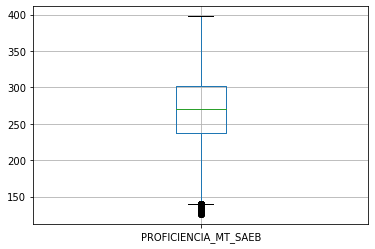

In [15]:
# Verificando outliers
df.boxplot(column=['PROFICIENCIA_MT_SAEB'])

# index
indexNames = df[ df['ESCALA_MT'] == "Nivel 8" ].index
df.drop(indexNames , inplace=True)
indexNames = df[ df['ESCALA_MT'] == "Nivel 7" ].index
df.drop(indexNames , inplace=True)
indexNames = df[ df['ESCALA_MT'] == "Nivel 6" ].index
df.drop(indexNames , inplace=True)
df.head()

In [16]:
df.shape

(871477, 56)

In [39]:
alunos = df.loc[:, ['PROFICIENCIA_LP_SAEB','PROFICIENCIA_MT_SAEB','TX_RESP_Q004','TX_RESP_Q008A','TX_RESP_Q008B','TX_RESP_Q009C',
                    'TX_RESP_Q009A','TX_RESP_Q009F','TX_RESP_Q009G','TX_RESP_Q010B','TX_RESP_Q010E',
                      'TX_RESP_Q010C','TX_RESP_Q010G', 'TX_RESP_Q010I', 'TX_RESP_Q015','TX_RESP_Q017A']]

alunos.columns = ["PROFICIENCIA_LP_SAEB","PROFICIENCIA_MT_SAEB", "Escolaridade Mãe", "Rua Pavimentada",
                    "Iluminação Rua", "Q Computador", "Q Geladeira","Q Banheiro",
                    "Q Carro", "Wifi", "Quarto só Seu", "Garagem", "Aspirador", "Freezer",
                    "Q Reprovação", "Tempo Lazer", 
                    ]
alunos.head()

,PROFICIENCIA_LP_SAEB,PROFICIENCIA_MT_SAEB,Escolaridade Mãe,Rua Pavimentada,Iluminação Rua,Q Computador,Q Geladeira,Q Banheiro,Q Carro,Wifi,Quarto só Seu,Garagem,Aspirador,Freezer,Q Reprovação,Tempo Lazer
1,222.526072,244.042645,E,A,A,A,B,B,B,B,B,B,B,B,A,D
3,256.798882,268.977498,E,A,A,B,B,B,B,B,B,B,A,B,A,C
6,232.336988,248.575792,C,A,A,A,A,B,A,B,A,A,A,B,C,D
8,275.683620,284.218609,C,A,A,A,B,B,B,B,A,A,A,B,A,D
13,247.310152,266.029122,F,A,A,B,B,B,B,B,A,A,A,B,B,B


In [40]:
catg = alunos.select_dtypes(include="object").columns.tolist()

for index in catg:
    alunos[index] = alunos[index].astype("category")

In [41]:
alunos.dtypes

PROFICIENCIA_LP_SAEB     float64
PROFICIENCIA_MT_SAEB     float64
Escolaridade Mãe        category
Rua Pavimentada         category
Iluminação Rua          category
Q Computador            category
Q Geladeira             category
Q Banheiro              category
Q Carro                 category
Wifi                    category
Quarto só Seu           category
Garagem                 category
Aspirador               category
Freezer                 category
Q Reprovação            category
Tempo Lazer             category
dtype: object

In [42]:
mat = alunos.drop(columns=["PROFICIENCIA_LP_SAEB"], axis=1) 
mat.head()

,PROFICIENCIA_MT_SAEB,Escolaridade Mãe,Rua Pavimentada,Iluminação Rua,Q Computador,Q Geladeira,Q Banheiro,Q Carro,Wifi,Quarto só Seu,Garagem,Aspirador,Freezer,Q Reprovação,Tempo Lazer
1,244.042645,E,A,A,A,B,B,B,B,B,B,B,B,A,D
3,268.977498,E,A,A,B,B,B,B,B,B,B,A,B,A,C
6,248.575792,C,A,A,A,A,B,A,B,A,A,A,B,C,D
8,284.218609,C,A,A,A,B,B,B,B,A,A,A,B,A,D
13,266.029122,F,A,A,B,B,B,B,B,A,A,A,B,B,B


In [43]:
port = alunos.drop(columns=["PROFICIENCIA_MT_SAEB"], axis=1) 
port.head()

,PROFICIENCIA_LP_SAEB,Escolaridade Mãe,Rua Pavimentada,Iluminação Rua,Q Computador,Q Geladeira,Q Banheiro,Q Carro,Wifi,Quarto só Seu,Garagem,Aspirador,Freezer,Q Reprovação,Tempo Lazer
1,222.526072,E,A,A,A,B,B,B,B,B,B,B,B,A,D
3,256.798882,E,A,A,B,B,B,B,B,B,B,A,B,A,C
6,232.336988,C,A,A,A,A,B,A,B,A,A,A,B,C,D
8,275.683620,C,A,A,A,B,B,B,B,A,A,A,B,A,D
13,247.310152,F,A,A,B,B,B,B,B,A,A,A,B,B,B


In [44]:
alunos['Iluminação Rua'].unique()

['A', 'B']
Categories (2, object): ['A', 'B']

In [45]:
catNominal = ["Rua Pavimentada", "Iluminação Rua", "Wifi", 
              "Quarto só Seu", "Garagem", "Aspirador", "Freezer",
              ]

catOrdinal = ["Escolaridade Mãe", "Q Computador", "Q Geladeira",
              "Q Banheiro", "Q Carro", "Q Reprovação", "Tempo Lazer", 
                    ]

In [46]:
# Transformado os dados
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, OrdinalEncoder

label_encoder = LabelEncoder()

for index in catOrdinal:
    mat[index] = label_encoder.fit_transform(mat[index])
    port[index] = label_encoder.fit_transform(port[index])

In [47]:
port.head()

,PROFICIENCIA_LP_SAEB,Escolaridade Mãe,Rua Pavimentada,Iluminação Rua,Q Computador,Q Geladeira,Q Banheiro,Q Carro,Wifi,Quarto só Seu,Garagem,Aspirador,Freezer,Q Reprovação,Tempo Lazer
1,222.526072,4,A,A,0,1,1,1,B,B,B,B,B,0,3
3,256.798882,4,A,A,1,1,1,1,B,B,B,A,B,0,2
6,232.336988,2,A,A,0,0,1,0,B,A,A,A,B,2,3
8,275.683620,2,A,A,0,1,1,1,B,A,A,A,B,0,3
13,247.310152,5,A,A,1,1,1,1,B,A,A,A,B,1,1


In [48]:
onehot_encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)
for index in catNominal:
    oneh = onehot_encoder.fit_transform(mat[[index]])
    novo = pd.DataFrame(oneh, columns=[index+str(i) for i in mat[index].unique().tolist()])    
    mat.reset_index(drop=True, inplace=True)
    mat = pd.concat([mat, novo], axis=1)
    mat.drop(index, axis=1, inplace=True)

    onehp = onehot_encoder.fit_transform(port[[index]])
    novop = pd.DataFrame(onehp, columns=[index+str(i) for i in port[index].unique().tolist()]) 
    port.reset_index(drop=True, inplace=True)
    port = pd.concat([port, novop], axis=1)
    port.drop(index, axis=1, inplace=True)

In [49]:
mat.head()

,PROFICIENCIA_MT_SAEB,Escolaridade Mãe,Q Computador,Q Geladeira,Q Banheiro,Q Carro,Q Reprovação,Tempo Lazer,Rua PavimentadaA,Rua PavimentadaB,...,WifiB,WifiA,Quarto só SeuB,Quarto só SeuA,GaragemB,GaragemA,AspiradorB,AspiradorA,FreezerB,FreezerA
0,244.042645,4,0,1,1,1,0,3,1.0,0.0,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0
1,268.977498,4,1,1,1,1,0,2,1.0,0.0,...,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0
2,248.575792,2,0,0,1,0,2,3,1.0,0.0,...,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
3,284.218609,2,0,1,1,1,0,3,1.0,0.0,...,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
4,266.029122,5,1,1,1,1,1,1,1.0,0.0,...,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0


In [50]:
port.head()

,PROFICIENCIA_LP_SAEB,Escolaridade Mãe,Q Computador,Q Geladeira,Q Banheiro,Q Carro,Q Reprovação,Tempo Lazer,Rua PavimentadaA,Rua PavimentadaB,...,WifiB,WifiA,Quarto só SeuB,Quarto só SeuA,GaragemB,GaragemA,AspiradorB,AspiradorA,FreezerB,FreezerA
0,222.526072,4,0,1,1,1,0,3,1.0,0.0,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0
1,256.798882,4,1,1,1,1,0,2,1.0,0.0,...,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0
2,232.336988,2,0,0,1,0,2,3,1.0,0.0,...,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
3,275.683620,2,0,1,1,1,0,3,1.0,0.0,...,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
4,247.310152,5,1,1,1,1,1,1,1.0,0.0,...,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0


In [51]:
# Separando as variáveis
X = mat.drop(columns=["PROFICIENCIA_MT_SAEB"], axis=1).values
y = mat[["PROFICIENCIA_MT_SAEB"]].values.ravel()

In [52]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42)

In [26]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
scaler_1 = MinMaxScaler()
scaler_2 = StandardScaler()

X_train = scaler_1.fit_transform(X_train)
X_test = scaler_1.fit_transform(X_test)

print(X_train.shape)
print(X_test.shape)

(697181, 21)
(174296, 21)


In [ ]:
from sklearn.tree import DecisionTreeRegressor 
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

models = []
models.append(("DT", DecisionTreeRegressor(random_state=42)))
models.append(("RF", RandomForestRegressor(random_state=42)))

for index in models:
    name = index[0]
    model = index[1]
    scores = cross_val_score(model, X_train, y_train, scoring='neg_mean_absolute_error', cv=10, n_jobs=-1, error_score='raise')
    print("Name: {} => Mean R2-Score: {} Desvio R2-Score: {}".format(name, round(scores.mean(), 2), round(scores.std(),2)))

    model.fit(X_train,y_train)
    r2_train = r2_score(y_train, model.predict(X_train)).round(2)
    r2_test = r2_score(y_test, model.predict(X_test)).round(2)

    mae_train = mean_absolute_error(y_train, model.predict(X_train)).round(2)
    mae_test = mean_absolute_error(y_test, model.predict(X_test)).round(2)
    
    #model.score(X_test, y_test).round(2) retorna o coeficiente de determinação ou r2_score do teste
    
    #mse_train = mean_squared_error(y_train, model.predict(X_train)).round(2)
    #mse_test = mean_squared_error(y_test, model.predict(X_test)).round(2)

    #rmse_train = np.sqrt(mean_absolute_error(y_train, model.predict(X_train))).round(2)
    #rmse_test = np.sqrt(mean_absolute_error(y_test, model.predict(X_test))).round(2)

    print("R2-SCORE TREINO: {} \nR2-SCORE TESTE: {}".format(r2_train, r2_test))
    print("MAE TREINO: {} \nMAE TESTE: {}".format(mae_train, mae_test)) # O mais robusto para dados com outliers
    #print("MSE TREINO: {} MSE TESTE: {}".format(mse_train, mse_test))
    #print("RMSE TREINO: {} RMSE TESTE: {}".format(rmse_train, rmse_test))
    #print("\n")

Name: DT => Mean R2-Score: -37.06 Desvio R2-Score: 0.09
R2-SCORE TREINO: 0.32 
R2-SCORE TESTE: 0.03
MAE TREINO: 29.72 
MAE TESTE: 36.87


In [53]:
alunos2 = df.loc[:, ['PROFICIENCIA_MT_SAEB','TX_RESP_Q004','TX_RESP_Q008A','TX_RESP_Q008B','TX_RESP_Q009C',
                    'TX_RESP_Q009A','TX_RESP_Q009F','TX_RESP_Q009G','TX_RESP_Q010B','TX_RESP_Q010E',
                      'TX_RESP_Q010C','TX_RESP_Q010G', 'TX_RESP_Q010I', 'TX_RESP_Q015','TX_RESP_Q017A']]

alunos2.columns = ["PROFICIENCIA_MT_SAEB", "Escolaridade Mãe", "Rua Pavimentada",
                    "Iluminação Rua", "Q Computador", "Q Geladeira","Q Banheiro",
                    "Q Carro", "Wifi", "Quarto só Seu", "Garagem", "Aspirador", "Freezer",
                    "Q Reprovação", "Tempo Lazer", 
                    ]
alunos2.head()

,PROFICIENCIA_MT_SAEB,Escolaridade Mãe,Rua Pavimentada,Iluminação Rua,Q Computador,Q Geladeira,Q Banheiro,Q Carro,Wifi,Quarto só Seu,Garagem,Aspirador,Freezer,Q Reprovação,Tempo Lazer
1,244.042645,E,A,A,A,B,B,B,B,B,B,B,B,A,D
3,268.977498,E,A,A,B,B,B,B,B,B,B,A,B,A,C
6,248.575792,C,A,A,A,A,B,A,B,A,A,A,B,C,D
8,284.218609,C,A,A,A,B,B,B,B,A,A,A,B,A,D
13,266.029122,F,A,A,B,B,B,B,B,A,A,A,B,B,B


In [54]:
# Separando dados por niveis
escala = [
    (alunos2["PROFICIENCIA_MT_SAEB"] < 200),
    (alunos2["PROFICIENCIA_MT_SAEB"] >= 200) & (alunos2["PROFICIENCIA_MT_SAEB"] < 250),
    (alunos2["PROFICIENCIA_MT_SAEB"] >= 250) & (alunos2["PROFICIENCIA_MT_SAEB"] < 300),
    (alunos2["PROFICIENCIA_MT_SAEB"] >= 300) & (alunos2["PROFICIENCIA_MT_SAEB"] < 350),
    (alunos2["PROFICIENCIA_MT_SAEB"] >= 350) & (alunos2["PROFICIENCIA_MT_SAEB"] < 400),
    (alunos2["PROFICIENCIA_MT_SAEB"] >= 400)
    ]
nivel = ["Nivel 0", "Nivel 1", "Nivel 2", "Nivel 3", "Nivel 4", "Nivel 5"]

alunos2["ESCALA_MT2"] = np.select(escala, nivel)
alunos2.head()

,PROFICIENCIA_MT_SAEB,Escolaridade Mãe,Rua Pavimentada,Iluminação Rua,Q Computador,Q Geladeira,Q Banheiro,Q Carro,Wifi,Quarto só Seu,Garagem,Aspirador,Freezer,Q Reprovação,Tempo Lazer,ESCALA_MT2
1,244.042645,E,A,A,A,B,B,B,B,B,B,B,B,A,D,Nivel 1
3,268.977498,E,A,A,B,B,B,B,B,B,B,A,B,A,C,Nivel 2
6,248.575792,C,A,A,A,A,B,A,B,A,A,A,B,C,D,Nivel 1
8,284.218609,C,A,A,A,B,B,B,B,A,A,A,B,A,D,Nivel 2
13,266.029122,F,A,A,B,B,B,B,B,A,A,A,B,B,B,Nivel 2


In [55]:
# Transformado os dados
from sklearn.preprocessing import LabelEncoder

colums = ["ESCALA_MT2", "Escolaridade Mãe", "Rua Pavimentada",
                    "Iluminação Rua", "Q Computador", "Q Geladeira","Q Banheiro",
                    "Q Carro", "Wifi", "Quarto só Seu", "Garagem", "Aspirador", "Freezer",
                    "Q Reprovação", "Tempo Lazer", 
                    ]

label_encoder = LabelEncoder()

for index in colums:
    alunos2[index] = label_encoder.fit_transform(alunos2[index])

In [56]:
alunos2.head()

,PROFICIENCIA_MT_SAEB,Escolaridade Mãe,Rua Pavimentada,Iluminação Rua,Q Computador,Q Geladeira,Q Banheiro,Q Carro,Wifi,Quarto só Seu,Garagem,Aspirador,Freezer,Q Reprovação,Tempo Lazer,ESCALA_MT2
1,244.042645,4,0,0,0,1,1,1,1,1,1,1,1,0,3,1
3,268.977498,4,0,0,1,1,1,1,1,1,1,0,1,0,2,2
6,248.575792,2,0,0,0,0,1,0,1,0,0,0,1,2,3,1
8,284.218609,2,0,0,0,1,1,1,1,0,0,0,1,0,3,2
13,266.029122,5,0,0,1,1,1,1,1,0,0,0,1,1,1,2


In [57]:
alunos2.shape

(871477, 16)

In [58]:
df_aux= df.iloc[:, 6:]
df_aux.head()

,PROFICIENCIA_MT_SAEB,TX_RESP_Q001,TX_RESP_Q002,TX_RESP_Q003A,TX_RESP_Q003B,TX_RESP_Q003C,TX_RESP_Q003D,TX_RESP_Q003E,TX_RESP_Q004,TX_RESP_Q005,...,TX_RESP_Q016,TX_RESP_Q017A,TX_RESP_Q017B,TX_RESP_Q017C,TX_RESP_Q017D,TX_RESP_Q017E,TX_RESP_Q018A,TX_RESP_Q018B,TX_RESP_Q018C,TX_RESP_Q019
1,244.042645,A,C,B,A,B,B,B,E,D,...,A,D,A,D,B,A,A,A,A,C
3,268.977498,A,C,B,B,B,A,A,E,D,...,A,C,A,D,C,A,A,A,A,D
6,248.575792,A,C,B,A,B,A,A,C,F,...,C,D,A,D,B,A,B,A,A,D
8,284.218609,A,C,B,B,B,A,A,C,A,...,A,D,A,D,B,D,B,A,A,C
13,266.029122,A,C,B,B,B,A,A,F,B,...,A,B,A,D,B,B,B,B,B,D


# Questões avaliadas
Qt=['Nota','ESCALA_MT','TX_RESP_Q001' ,'TX_RESP_Q002',
 'TX_RESP_Q003A' ,'TX_RESP_Q003B' ,'TX_RESP_Q003C', 'TX_RESP_Q003D',
 'TX_RESP_Q003E', 'TX_RESP_Q004', 'TX_RESP_Q005' ,'TX_RESP_Q006A',
 'TX_RESP_Q006B', 'TX_RESP_Q006C' ,'TX_RESP_Q006D', 'TX_RESP_Q006E',
 'TX_RESP_Q007' ,'TX_RESP_Q008A', 'TX_RESP_Q008B', 'TX_RESP_Q008C',
 'TX_RESP_Q009A' ,'TX_RESP_Q009B', 'TX_RESP_Q009C' ,'TX_RESP_Q009D',
 'TX_RESP_Q009E' ,'TX_RESP_Q009F' ,'TX_RESP_Q009G' ,'TX_RESP_Q010A',
 'TX_RESP_Q010B' ,'TX_RESP_Q010C', 'TX_RESP_Q010D' ,'TX_RESP_Q010E',
 'TX_RESP_Q010F', 'TX_RESP_Q010G', 'TX_RESP_Q010H', 'TX_RESP_Q010I',
 'TX_RESP_Q011', 'TX_RESP_Q012', 'TX_RESP_Q013' ,'TX_RESP_Q014',
 'TX_RESP_Q015', 'TX_RESP_Q016' ,'TX_RESP_Q017A' ,'TX_RESP_Q017B',
 'TX_RESP_Q017C' ,'TX_RESP_Q017D', 'TX_RESP_Q017E' ,'TX_RESP_Q018A',
 'TX_RESP_Q018B' ,'TX_RESP_Q018C' ,'TX_RESP_Q019']

# Variáveis qualitativas nominais:
Questões 1 - 3e

Questões 8a - 8c

Questões 10a - 10i

Questão 12, 14

# Variáveis quantitativas:
PROFICIENCIA_MT_SAEB

# Variáveis qualitativas ordinais:
Todas as que restaram

In [34]:
alunos2.corr(method='spearman')

,PROFICIENCIA_MT_SAEB,Escolaridade Mãe,Rua Pavimentada,Iluminação Rua,Q Computador,Q Geladeira,Q Banheiro,Q Carro,Wifi,Quarto só Seu,Garagem,Aspirador,Freezer,Q Reprovação,Tempo Lazer,ESCALA_MT2
PROFICIENCIA_MT_SAEB,1.000000,-0.020441,0.123585,0.138433,0.214138,0.022830,0.124904,0.167766,0.157390,0.155761,0.046390,0.139304,0.183323,-0.261003,0.215281,0.952594
Escolaridade Mãe,-0.020441,1.000000,0.056723,0.024938,0.092688,0.023659,0.063001,0.059356,0.051474,0.042170,0.006439,0.045094,0.028361,-0.012216,0.028913,-0.019297
Rua Pavimentada,0.123585,0.056723,1.000000,0.320091,0.201253,0.035931,0.113913,0.112677,0.233695,0.149032,0.008315,0.126064,0.135856,-0.066523,0.149715,0.118363
Iluminação Rua,0.138433,0.024938,0.320091,1.000000,0.163056,0.028139,0.092819,0.107984,0.187371,0.139339,0.027914,0.119786,0.119516,-0.055403,0.126171,0.132576
Q Computador,0.214138,0.092688,0.201253,0.163056,1.000000,0.164047,0.291490,0.381446,0.372194,0.308155,0.121457,0.339284,0.247232,-0.104703,0.176442,0.204667
Q Geladeira,0.022830,0.023659,0.035931,0.028139,0.164047,1.000000,0.255617,0.190492,0.098313,0.125474,0.075138,0.137930,0.125317,-0.000510,0.061230,0.021277
Q Banheiro,0.124904,0.063001,0.113913,0.092819,0.291490,0.255617,1.000000,0.314970,0.197198,0.283512,0.195780,0.222745,0.166632,-0.056414,0.097012,0.119260
Q Carro,0.167766,0.059356,0.112677,0.107984,0.381446,0.190492,0.314970,1.000000,0.276383,0.525480,0.162443,0.410348,0.245498,-0.085736,0.117897,0.159778
Wifi,0.157390,0.051474,0.233695,0.187371,0.372194,0.098313,0.197198,0.276383,1.000000,0.271379,0.092246,0.233522,0.224603,-0.078274,0.212166,0.149946
Quarto só Seu,0.155761,0.042170,0.149032,0.139339,0.308155,0.125474,0.283512,0.525480,0.271379,1.000000,0.179582,0.326357,0.234616,-0.082384,0.131311,0.148021


In [75]:
# Var Ordinais
catOrdinal = ["ESCALA_MT2", "Escolaridade Mãe", "Q Computador", "Q Geladeira",
              "Q Banheiro", "Q Carro", "Q Reprovação", "Tempo Lazer", 
                    ]

df_home=alunos2[catOrdinal]
df_home.head()

,ESCALA_MT2,Escolaridade Mãe,Q Computador,Q Geladeira,Q Banheiro,Q Carro,Q Reprovação,Tempo Lazer
1,1,4,0,1,1,1,0,3
3,2,4,1,1,1,1,0,2
6,1,2,0,0,1,0,2,3
8,2,2,0,1,1,1,0,3
13,2,5,1,1,1,1,1,1


In [76]:
df_home.dtypes

ESCALA_MT2          int32
Escolaridade Mãe    int32
Q Computador        int32
Q Geladeira         int32
Q Banheiro          int32
Q Carro             int32
Q Reprovação        int32
Tempo Lazer         int32
dtype: object

In [78]:
m =df_home.drop("ESCALA_MT2", axis=1)
cat = m.columns.tolist()

lista_s = []
lista_p = []
for index in cat:
    s = spearmanr(df_home[index], df_home["ESCALA_MT2"])
    lista_s.append(round(s.correlation, 2))
    lista_p.append(round(s.pvalue, 2))

novo = pd.DataFrame(list(zip(cat, lista_s, lista_p)), columns=["Feature", "Spearmanr", "P-Valor"]).sort_values(by="Spearmanr", ascending=False)
novo

,Feature,Spearmanr,P-Valor
6,Tempo Lazer,0.21,0.0
1,Q Computador,0.20,0.0
4,Q Carro,0.16,0.0
3,Q Banheiro,0.12,0.0
2,Q Geladeira,0.02,0.0
0,Escolaridade Mãe,-0.02,0.0
5,Q Reprovação,-0.25,0.0


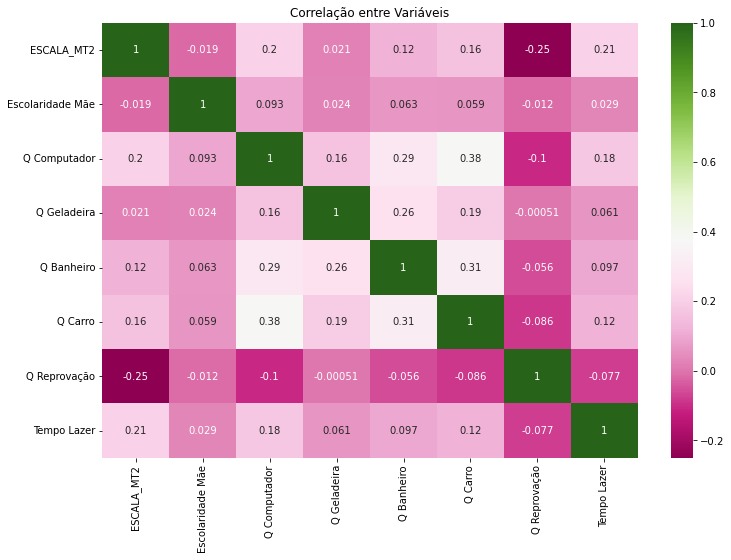

In [79]:
plt.figure(figsize=(12,8))
sn.heatmap(df_home.corr(method="spearman"), annot=True, cmap="PiYG")
plt.title("Correlação entre Variáveis")
plt.show()

# Variáveis

8a - Se sua rua é pavimentada.

8b - Se tem água tratada.

9c - Quantos computadores ou notebooks existem na sua casa.

9f - Quantos banheiros existem na sua casa.

9g - Quantos carros existem na sua casa.

10b - Se tem Wifi em casa

10e - Se tem garagem em casa.

10f - Se tem forno microondas em casa.
10g

10i - Se tem geladeira ou freezer em casa.

15 - numéro de reprovação.

17a - tempo de lazer fora da escola.

18a - Frequencia ler notícias.

In [61]:
# Variáveis nominais
catNominal = ["ESCALA_MT2", "Rua Pavimentada", "Iluminação Rua", "Wifi", 
              "Quarto só Seu", "Garagem", "Aspirador", "Freezer"]

df_home = alunos2[catNominal]

In [62]:
from sklearn.feature_selection import chi2

# Split dataset
X = df_home.drop(['ESCALA_MT2'], axis=1)
y = df_home.ESCALA_MT2

# Calculando Chi-Squared
chi_scores = chi2(X,y)

# Colocando label nos resultados para posterior plot
scores = pd.Series(chi_scores[0], index=X.columns)
pvalues = pd.Series(chi_scores[1], index=X.columns)

# Results
pd.DataFrame({'Chi2':scores, 'p-Value':pvalues})

,Chi2,p-Value
Rua Pavimentada,2788.728745,0.000000e+00
Iluminação Rua,2886.788938,0.000000e+00
Wifi,4390.698265,0.000000e+00
Quarto só Seu,7651.193301,0.000000e+00
Garagem,796.501919,4.395940e-171
Aspirador,10542.187271,0.000000e+00
Freezer,6429.905999,0.000000e+00


#  Modelos de regressão e classificação

In [45]:
# Implementando metodos

# Split dataset in features and target variable

X = df_home.iloc[:, 1:].values # Features
y = df_home.iloc[:, 0].values # Target variable    


In [46]:
######################################
# Importando as blibiotecas
######################################
 
import sklearn.model_selection as ms
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.linear_model import LogisticRegression

# Separar dados em Treino e Teste
 
X_train, X_test, y_train, y_test = ms.train_test_split(X, y, test_size = 1/5, random_state = 0)
 
# Treinando o modelo
 
classifier = LogisticRegression(multi_class='multinomial', max_iter = 300)
classifier.fit(X_train, y_train)

# Previsao
 
y_pred = classifier.predict(X_test)
y_pred_prob = classifier.predict_proba(X_test)

y_pred_prob = y_pred_prob[:,0]

y_result_prob = np.concatenate((y_pred.reshape(len(y_pred),1), y_pred_prob.reshape(len(y_pred_prob),1)),1)

# Matrix de confusao

cm = confusion_matrix(y_test, y_pred)
print(cm)

y_result = np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1)

print(accuracy_score(y_test, y_pred))

[[  103  5280  9020   175     0]
 [  111 10140 33308   690     0]
 [   36  7491 59981  2441     0]
 [    7  1664 34084  2631     0]
 [    2   167  6108   857     0]]
0.4179958231973195


In [47]:
# Implementando metodos

X = df_home.iloc[:, 1:] # Features
y = df_home.iloc[:, 0] # Target variable    


# Armazenando os nomes das features e das classes em listas
df_target_names  = ["0", "1", "2", "3", "4", "5",]

df_features_names = X.columns.to_list()

print(df_features_names)

['Escolaridade Mãe', 'Rua Pavimentada', 'Iluminação Rua', 'Q Computador', 'Q Geladeira', 'Q Banheiro', 'Q Carro', 'Wifi', 'Quarto só Seu', 'Garagem', 'Aspirador', 'Freezer', 'Q Reprovação', 'Tempo Lazer']


In [48]:
df_home.head()

,ESCALA_MT2,Escolaridade Mãe,Rua Pavimentada,Iluminação Rua,Q Computador,Q Geladeira,Q Banheiro,Q Carro,Wifi,Quarto só Seu,Garagem,Aspirador,Freezer,Q Reprovação,Tempo Lazer
1,1,4,0,0,0,1,1,1,1,1,1,1,1,0,3
3,2,4,0,0,1,1,1,1,1,1,1,0,1,0,2
6,1,2,0,0,0,0,1,0,1,0,0,0,1,2,3
8,2,2,0,0,0,1,1,1,1,0,0,0,1,0,3
13,2,5,0,0,1,1,1,1,1,0,0,0,1,1,1


In [49]:
from scipy import stats
from sklearn import model_selection
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn import tree

# Árvore de decisão

In [50]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, precision_score
from sklearn.model_selection import train_test_split

cv_models_results = {} # Armazena os scores da validação cruzada de cada modelo avaliado
seed = 1275

X_tree = X.to_numpy()
y_tree = y.to_numpy()

# Divisao da base de dados em treinamento, validacao e teste
X_train, X_test, y_train, y_test = train_test_split(X_tree, y_tree, test_size=0.2, stratify=y_tree, random_state=seed)

# Instanciando o modelo
decisionTree = DecisionTreeClassifier(random_state=seed)

# K-fold estratificado com k = 10
cv = model_selection.StratifiedKFold(n_splits=10)

# Definição dos parâmetros para a árvore de decisão
param_distributions = { 'criterion': ['gini', 'entropy'],
                        'min_samples_split': range(1, 51),
                        'max_depth': [3,4,7,8],
                        'min_samples_leaf': [3,4,5,6,7,8,9,10]
                      }

# Definição random search para decision tree
rnd_search_tree = RandomizedSearchCV( estimator=decisionTree, 
                                      param_distributions = param_distributions, 
                                      n_iter=25, scoring='accuracy', 
                                      n_jobs=-1, cv=cv, random_state=seed
                                    )

# execute search
result_tree = rnd_search_tree.fit(X_train, y_train)

# summarize result for decision tree
print('=========Random Search Results for TREE==========')
print('Best Score: %s' % result_tree.best_score_)
print('Best Hyperparameters: %s' % result_tree.best_params_)

# Instanciando e avaliando o modelo
decisionTree = DecisionTreeClassifier(**result_tree.best_params_)

model = decisionTree.fit(X_train, y_train)
y_predicted = decisionTree.predict(X_test)

print('\nDesempenho médio da Árvore de Decisão:')

cv_results = model_selection.cross_val_score(decisionTree, X_train, y_train, cv=cv, scoring='accuracy')
cv_models_results['decisionTree'] = cv_results

name = 'Arvore de Decisão'
msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
print(msg)

print("\nAcuracia Árvore de Decisão: Treinamento",  decisionTree.score(X_train, y_train)," Teste", decisionTree.score(X_test, y_test))
print("\nClasification report:\n", classification_report(y_test, y_predicted))
print("Confusion matrix:\n", confusion_matrix(y_test, y_predicted))

=========Random Search Results for TREE==========
Best Score: 0.4204489208072718
Best Hyperparameters: {'min_samples_split': 30, 'min_samples_leaf': 7, 'max_depth': 8, 'criterion': 'entropy'}

Desempenho médio da Árvore de Decisão:
Arvore de Decisão: 0.420449 (0.001256)

Acuracia Árvore de Decisão: Treinamento 0.421422844282905  Teste 0.4197399825584064


C:\Users\wfs4.NB555-WFS4\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\wfs4.NB555-WFS4\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\wfs4.NB555-WFS4\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



Clasification report:
               precision    recall  f1-score   support

           0       0.39      0.01      0.01     14607
           1       0.41      0.25      0.31     44324
           2       0.43      0.82      0.56     70024
           3       0.39      0.12      0.19     38310
           4       0.00      0.00      0.00      7031

    accuracy                           0.42    174296
   macro avg       0.32      0.24      0.21    174296
weighted avg       0.39      0.42      0.35    174296

Confusion matrix:
 [[   91  5865  8393   258     0]
 [   85 11021 31935  1283     0]
 [   47  8274 57265  4438     0]
 [    9  1817 31702  4782     0]
 [    0   188  5301  1542     0]]


In [51]:
text_representation = tree.export_text(decisionTree, feature_names=df_features_names)
print(text_representation)

|--- Q Reprovação <= 0.50
|   |--- Tempo Lazer <= 1.50
|   |   |--- Tempo Lazer <= 0.50
|   |   |   |--- Freezer <= 0.50
|   |   |   |   |--- Escolaridade Mãe <= 4.50
|   |   |   |   |   |--- Rua Pavimentada <= 0.50
|   |   |   |   |   |   |--- Quarto só Seu <= 0.50
|   |   |   |   |   |   |   |--- Q Banheiro <= 1.50
|   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |--- Q Banheiro >  1.50
|   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |--- Quarto só Seu >  0.50
|   |   |   |   |   |   |   |--- Garagem <= 0.50
|   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |--- Garagem >  0.50
|   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- Rua Pavimentada >  0.50
|   |   |   |   |   |   |--- Iluminação Rua <= 0.50
|   |   |   |   |   |   |   |--- Aspirador <= 0.50
|   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |--- Aspirador >  0.50
|   |   |   |   |   |   |   |   |--- class: 0
|

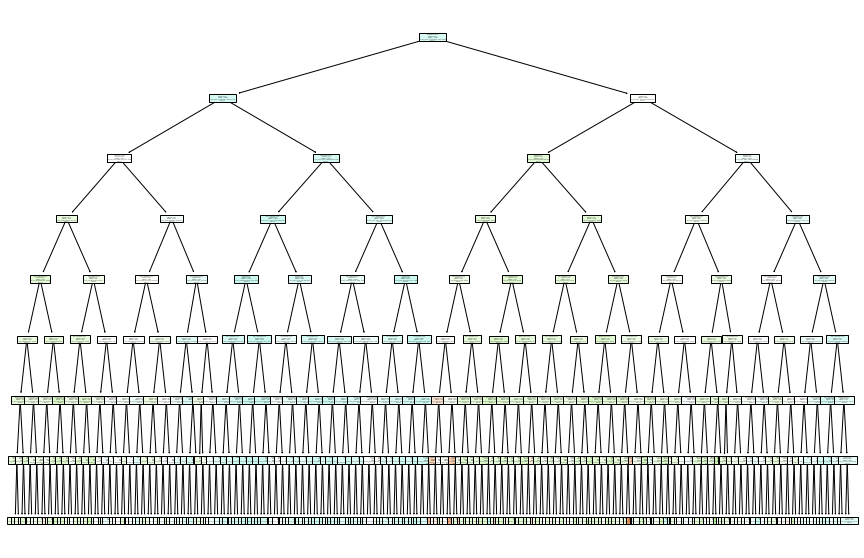

In [52]:
fig = plt.figure(figsize=(15,10))
_ = tree.plot_tree(decisionTree, 
                   feature_names=df_features_names,  
                   class_names=df_target_names,
                   filled=True)

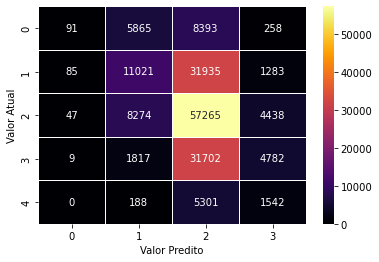

In [53]:
### Representação Gráfica da Matrix de Confusão da Árvore de Decisão

tree_confusion_matrix = pd.crosstab(y_test, y_predicted, rownames=['Valor Atual'], colnames=['Valor Predito'])

sn.heatmap(tree_confusion_matrix, annot=True, fmt="d", cmap='inferno', linewidths=.5)
plt.show()

In [54]:
# Features mais importantes
for feat in sorted(zip(df_features_names, decisionTree.feature_importances_), reverse=True, key=lambda x:x[1]):
  print(feat)

('Q Reprovação', 0.3748943362191231)
('Tempo Lazer', 0.270535896492885)
('Q Computador', 0.12802333325493534)
('Escolaridade Mãe', 0.10245826217309661)
('Freezer', 0.05240391600745709)
('Iluminação Rua', 0.033314984165510646)
('Q Carro', 0.02277549346691191)
('Rua Pavimentada', 0.00766843126813731)
('Q Geladeira', 0.002271918140373252)
('Q Banheiro', 0.001959270369837622)
('Quarto só Seu', 0.0012686539778569844)
('Wifi', 0.001104433830503198)
('Garagem', 0.0008777531099847262)
('Aspirador', 0.0004433175233873547)


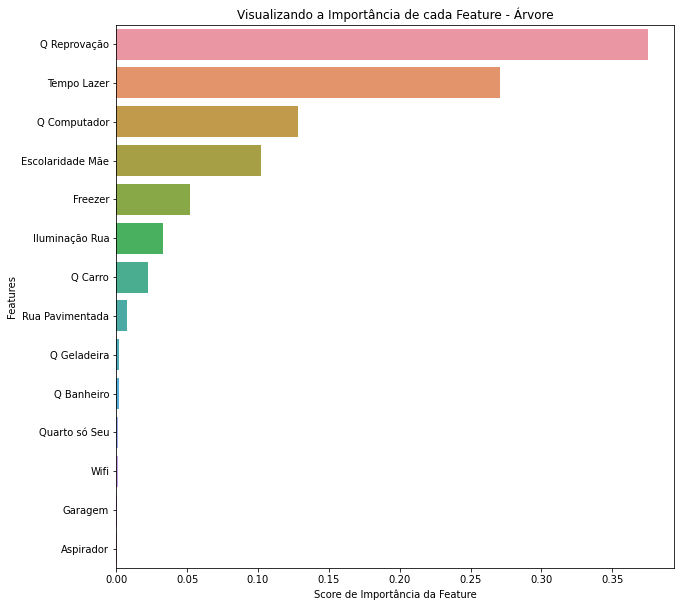

In [56]:
feature_imp = pd.Series(decisionTree.feature_importances_, index=df_features_names).sort_values(ascending=False)

plt.figure(figsize=(10,10))
sn.barplot(x=feature_imp, y=feature_imp.index)
plt.xlabel('Score de Importância da Feature')
plt.ylabel('Features')
plt.title("Visualizando a Importância de cada Feature - Árvore")
plt.show()

# Random Forest

In [57]:
from sklearn.ensemble import RandomForestClassifier
## Random Forest

X_rfc = X.to_numpy()
y_rfc = y.to_numpy()

# Divisao da base de dados em treinamento, validacao e teste
X_train, X_test, y_train, y_test = train_test_split(X_rfc, y_rfc, test_size=0.2, stratify=y_rfc, random_state=seed)

# Instanciando o modelo
rfc = RandomForestClassifier(random_state=seed)

# K-fold estratificado com k = 10
cv = model_selection.StratifiedKFold(n_splits=10)

# definição dos parâmetros para a árvore de decisão
param_distributions = { 
                        'n_estimators': [6,7,8,9,10,11,12,15],
                        'criterion': ['gini', 'entropy'],
                        'max_depth': [6,7,8,9,10,12],
                        'min_samples_split': [7,8,9,10,12,15],
                        'min_samples_leaf': [3,4,5,6,7,8,9,10],
                        'max_features':['auto', 'sqrt', 'log2']
                      }

# define random search for decision tree
rnd_search_rfc = RandomizedSearchCV(  estimator=rfc, 
                                      param_distributions = param_distributions, 
                                      n_iter=25, scoring='accuracy', 
                                      n_jobs=-1, cv=cv, random_state=seed
                                    )
# execute search
result_rfc = rnd_search_rfc.fit(X_train, y_train)

# summarize result for random forest
print('=========Random Search Results for RandomForest==========')
print('Best Score: %s' % result_rfc.best_score_)
print('Best Hyperparameters: %s' % result_rfc.best_params_)

# Instanciando e avaliando o modelo
RFC = RandomForestClassifier(**result_rfc.best_params_, random_state=seed)

model = RFC.fit(X_train, y_train)
y_predicted = RFC.predict(X_test)

print('\nDesempenho médio do RandomForest:')

cv_results = model_selection.cross_val_score(RFC, X_train, y_train, cv=cv, scoring='accuracy')
cv_models_results['randomForest'] = cv_results

name = 'RandomForest'
msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
print(msg)

print("\nAcuracia do Random Forest: Treinamento",  RFC.score(X_train, y_train)," Teste", RFC.score(X_test, y_test))
print("\nClasification report:\n", classification_report(y_test, y_predicted))
print("Confusion matrix:\n", confusion_matrix(y_test, y_predicted))

=========Random Search Results for RandomForest==========
Best Score: 0.4215720151031828
Best Hyperparameters: {'n_estimators': 10, 'min_samples_split': 9, 'min_samples_leaf': 7, 'max_features': 'sqrt', 'max_depth': 12, 'criterion': 'gini'}

Desempenho médio do RandomForest:
RandomForest: 0.421572 (0.001504)

Acuracia do Random Forest: Treinamento 0.4298697181936972  Teste 0.4212316978014412

Clasification report:
               precision    recall  f1-score   support

           0       0.42      0.01      0.03     14607
           1       0.41      0.24      0.30     44324
           2       0.42      0.85      0.57     70024
           3       0.41      0.08      0.13     38310
           4       0.00      0.00      0.00      7031

    accuracy                           0.42    174296
   macro avg       0.33      0.24      0.20    174296
weighted avg       0.40      0.42      0.33    174296



C:\Users\wfs4.NB555-WFS4\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\wfs4.NB555-WFS4\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\wfs4.NB555-WFS4\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Confusion matrix:
 [[  196  5653  8630   128     0]
 [  170 10715 32829   610     0]
 [   77  8053 59631  2263     0]
 [   22  1740 33671  2877     0]
 [    1   174  5763  1093     0]]


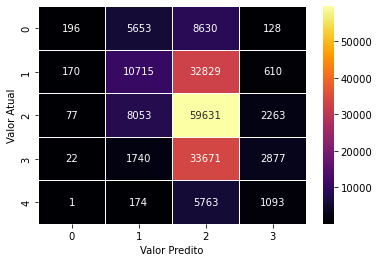

In [58]:
import seaborn as sn
### Representação Gráfica da Matrix de Confusão do Comitê de Árvore (Random Forest)

rnd_frt_confusion_matrix = pd.crosstab(y_test, y_predicted, rownames=['Valor Atual'], colnames=['Valor Predito'])

sn.heatmap(rnd_frt_confusion_matrix, annot=True, fmt="d", cmap='inferno', linewidths=.5)
plt.show()

In [59]:
# Features mais importantes
for feat in sorted(zip(df_features_names, RFC.feature_importances_), reverse=True, key=lambda x:x[1]):
  print(feat)

('Q Reprovação', 0.25206884766643345)
('Tempo Lazer', 0.21607329246849197)
('Escolaridade Mãe', 0.09710456657622649)
('Freezer', 0.09064418288462947)
('Q Computador', 0.06773309541152639)
('Q Carro', 0.06682962033858379)
('Q Banheiro', 0.03698164465831687)
('Iluminação Rua', 0.03676591007896309)
('Wifi', 0.03083388290182107)
('Aspirador', 0.024839406232843766)
('Q Geladeira', 0.022647244203722286)
('Rua Pavimentada', 0.021755181061469907)
('Quarto só Seu', 0.02137233416670455)
('Garagem', 0.014350791350266966)


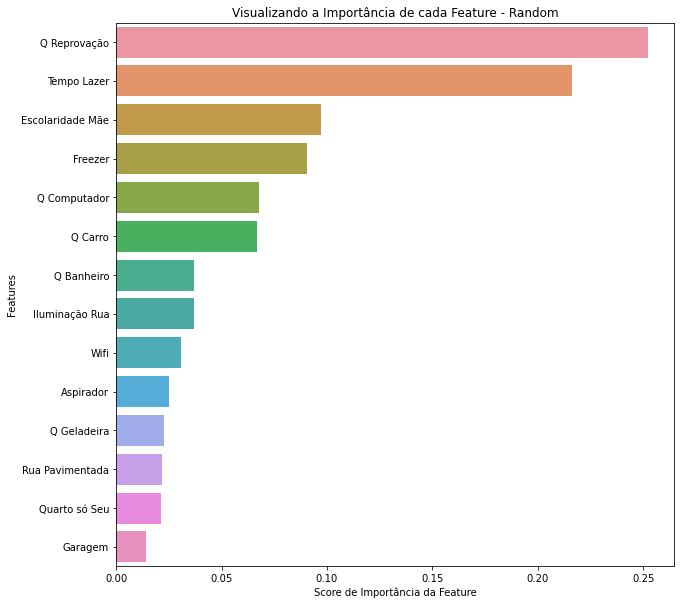

In [61]:
feature_imp = pd.Series(RFC.feature_importances_, index=df_features_names).sort_values(ascending=False)

plt.figure(figsize=(10,10))
sn.barplot(x=feature_imp, y=feature_imp.index)
plt.xlabel('Score de Importância da Feature')
plt.ylabel('Features')
plt.title("Visualizando a Importância de cada Feature - Random")
plt.show()